In [1]:
"""
Lecture 1.5 Case Study Multivariate Regression

Jackson School of Global Affairs                 
                                                 
 Created by Ardina Hasanbasri for GLBL 5021      
                                                 
Additional reference code and data used:        
Békés & Kézdi (2021) see more code below         
https://gabors-data-analysis.com/               
                                            
"""

#-----------------------------------#
# Setting Up                        #
# ----------------------------------#

import os
import sys
import warnings
import numpy as np
import pandas as pd
import pyfixest as pf
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.formula.api as smf
from typing import List
warnings.filterwarnings("ignore") 


# --------------------------------------------------#
# Load data (local .dta)
# --------------------------------------------------#

wage_data, meta = pyreadstat.read_dta("L15_wage_postgrad_clean.dta ")


# --------------------------------------------------#
# Exercise 1
# --------------------------------------------------#

reg1 = pf.feols("lnw ~ female", wage_data ,vcov="HC1")
reg2 = pf.feols("lnw ~ female + age", wage_data ,vcov="HC1")
reg3 = pf.feols("lnw ~ female + age + agesq", wage_data ,vcov="HC1")
reg4 = pf.feols("lnw ~ female + age + agesq + agecu + agequ", wage_data ,vcov="HC1")


pf.etable([reg1, reg2, reg3, reg4])

# --------------------------------------------------#
# Exercise 2
# --------------------------------------------------#

reg5 = pf.feols("lnw ~ female + edProf + edPhd", wage_data, vcov="HC1")
reg6 = pf.feols("lnw ~ female + edProf + edMA", wage_data, vcov="HC1")
reg7 = pf.feols("lnw ~ female + edMA + edPhd", wage_data, vcov="HC1")

pf.etable([reg5, reg6, reg7])

# --------------------------------------------------#
# Exercise 3 (Interactions)
# --------------------------------------------------#

wage_data = wage_data.assign(
    fXedMA=wage_data["edMA"] * wage_data["female"],
    fXedPhd=wage_data["edPhd"] * wage_data["female"],
    fXedProf=wage_data["edProf"] * wage_data["female"],
)

reg8 = pf.feols("lnw ~ female + age + edProf + edPhd + fXedPhd + fXedProf", wage_data, vcov="HC1")

pf.etable([reg1, reg3, reg8])

GT(_tbl_data=   level_0             level_1                       0  \
0     coef              female  -0.195*** <br> (0.008)   
1     coef                 age                           
2     coef               agesq                           
3     coef              edProf                           
4     coef               edPhd                           
5     coef             fXedPhd                           
6     coef            fXedProf                           
7     coef           Intercept   3.514*** <br> (0.006)   
8    stats        Observations                   18241   
9    stats           S.E. type                  hetero   
10   stats       R<sup>2</sup>                   0.028   
11   stats  Adj. R<sup>2</sup>                   0.028   

                         1                       2  
0   -0.183*** <br> (0.008)  -0.196*** <br> (0.009)  
1    0.063*** <br> (0.003)   0.007*** <br> (0.000)  
2   -0.001*** <br> (0.000)                          
3                            0.112*** <br> (0.017)  
4                            0.066*** <br> (0.018)  
5                            0.138*** <br> (0.025)  
6                               0.044 <br> (0.030)  
7    2.027*** <br> (0.073)   3.173*** <br> (0.018)  
8                    18241                   18241  
9                   hetero                  hetero  
10                   0.060                   0.057  
11                   0.059                   0.056  , _body=<great_tables._gt_data.Body object at 0x0000029DE9C787D0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000029DE9C93A90>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x0000029DE9C93150>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x0000029DE9C932D0>, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000029DE9C93250>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_fo

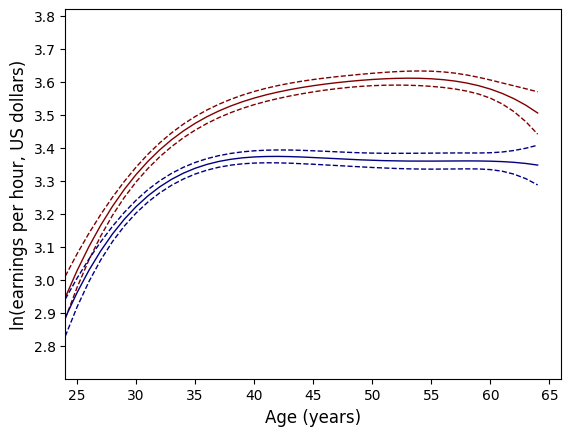

GT(_tbl_data=  level_0             level_1                       0                       1  \
0    coef              female  -0.224*** <br> (0.012)  -0.207*** <br> (0.012)   
1   stats        Observations                    9816                    9816   
2   stats           S.E. type                     iid                     iid   
3   stats       R<sup>2</sup>                   0.036                   0.047   
4   stats  Adj. R<sup>2</sup>                   0.035                   0.046   

                        2                       3  
0  -0.152*** <br> (0.012)  -0.142*** <br> (0.012)  
1                    9816                    9816  
2                     iid                     iid  
3                   0.182                   0.195  
4                   0.169                   0.181  , _body=<great_tables._gt_data.Body object at 0x0000029D80AAA610>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000029D80814F10>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _summary_rows=<great_tables._gt_data.SummaryRows object at 0x0000029D80B66BD0>, _summary_rows_grand=<great_tables._gt_data.SummaryRows object at 0x0000029D80B65910>, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000029D80B64F10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type

In [15]:
# --------------------------------------------------#
# Exercise 4 (Bonus): interactions with age polynomials
# --------------------------------------------------#

wage_data = wage_data.assign(
    fXagesq=wage_data["female"] * wage_data["agesq"],
    fXagecu=wage_data["female"] * wage_data["agecu"],
    fXagequ=wage_data["female"] * wage_data["agequ"],
)

reg_bonus = pf.feols("lnw ~ age + agesq + agecu + agequ + female + fXagesq + fXagecu + fXagequ", wage_data, vcov="HC1")

data_m = wage_data.query("female==0")
pred = reg_bonus.predict(data_m,interval="prediction")[["fit","se_fit"]]

data_m = data_m.reset_index(drop=True).join(pred)

data_m["CIup"] = data_m["fit"] + 1.96 * data_m["se_fit"]
data_m["CIlo"] = data_m["fit"] - 1.96 * data_m["se_fit"]


data_f = wage_data.query("female==1")
pred = reg_bonus.predict(data_f,interval="prediction")[["fit","se_fit"]]

data_f = data_f.reset_index(drop=True).join(pred)

data_f["CIup"] = data_f["fit"] + 1.96 * data_f["se_fit"]
data_f["CIlo"] = data_f["fit"] - 1.96 * data_f["se_fit"]

col_m = "maroon"
col_f = "navy"

sns.lineplot(data=data_m,x="age",y="fit",linewidth=1,estimator=None,ci=False,color = col_m)
sns.lineplot(data=data_m,x="age",y="CIup",linewidth=1,estimator=None,ci=False,color = col_m,linestyle = "dashed")
sns.lineplot(data=data_m,x="age",y="CIlo",linewidth=1,estimator=None,ci=False,color = col_m,linestyle = "dashed")

sns.lineplot(data=data_f,x="age",y="fit",linewidth=1,estimator=None,ci=False,color = col_f)
sns.lineplot(data=data_f,x="age",y="CIup",linewidth=1,estimator=None,ci=False,color = col_f,linestyle = "dashed")
sns.lineplot(data=data_f,x="age",y="CIlo",linewidth=1,estimator=None,ci=False,color = col_f,linestyle = "dashed")

plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("ln(earnings per hour, US dollars)", fontsize=12)
plt.xlim(24,66)
plt.xticks(ticks=np.arange(25, 66, 5))
plt.ylim(2.7,3.82)
plt.yticks(ticks=np.arange(2.8, 3.9, 0.1))

plt.show()

# --------------------------------------------------#
# Replicate "final table from slides"
# --------------------------------------------------#

data40_60 = wage_data.loc[(wage_data["age"] >= 40) & (wage_data["age"] <= 60)].copy()

FAMILY = ["married", "divorced", "wirowed", "child1", "child2", "child3", "child4pl", "C(stfips)"]
WORK = ["hours", "fedgov", "stagov", "locgov", "nonprof", "union", "C(ind2dig)", "C(occ2dig)"]
DEMOG = ["age", "afram", "hisp", "asian", "othernonw", "nonUSborn", "edProf", "edPhd"]

f1 = "lnw ~ female"
f2 = "lnw ~ female + " + " + ".join(DEMOG)
f3 = "lnw ~ female + " + " + ".join(DEMOG + FAMILY + WORK)
f4 = "lnw ~ female + " + " + ".join(DEMOG + FAMILY + WORK + ["agesq", "agecu", "agequ", "hourssq", "hourscu", "hoursqu"])

reg1_slide = pf.feols(f1, data40_60)
reg2_slide = pf.feols(f2, data40_60)
reg3_slide = pf.feols(f3, data40_60)
reg4_slide = pf.feols(f4, data40_60)

pf.etable([reg1_slide, reg2_slide, reg3_slide, reg4_slide])

pf.etable([reg1_slide, reg2_slide, reg3_slide, reg4_slide], keep=["female"])